In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math

/Users/anujkatiyal/.virtualenvs/scientific/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Load CSV
filename = "full_data.csv"
df = pd.read_csv(filename)
peek = df.head(20)
print(df.shape)

(393, 11)


In [3]:
## Finding total minutes based on the time
df.drop("id", axis=1, inplace=True)  ## Make sure the id starts as 0, by default (removes the current id (starts wd 1)
df.head()

,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories
0,Running,Running,"Sun, 25 Sep 2016 4:06 AM",48:23,9.48,NaN,5.06,161.0,177.0,825
1,Running,Running,"Wed, 21 Sep 2016 7:55 AM",13:23,2.63,NaN,5.05,143.0,164.0,191
2,Strength Training,Strength Training,"Tue, 20 Sep 2016 7:23 AM",1:15:28,NaN,NaN,NaN,125.0,167.0,859
3,Running,Running,"Sun, 18 Sep 2016 6:57 AM",30:24,4.16,NaN,7.18,157.0,188.0,502
4,Running,Running,"Thu, 15 Sep 2016 3:03 AM",31:12,4.22,NaN,7.23,150.0,184.0,481


## Add a column to the dataframe

In [4]:
totmins = []
for index, rows in df.iterrows():
    curr_time = rows.time.split(":")
    if len(curr_time) == 2:
        final_time = curr_time[0] + "." + curr_time[1]
    else:
#         print curr_time
        mins = int(curr_time[0])*60 + int(curr_time[1])
        final_time = str(mins) + "." + curr_time[2]
    totmins.append(final_time)
df["totmins"] = pd.Series(totmins) # always use the bracket notation
df["totmins"] = df["totmins"].astype("float")
 
df["startTime"] = pd.to_datetime(df["startTime"])

In [5]:
df.dtypes

activityName                object
activityType                object
startTime           datetime64[ns]
time                        object
distance                   float64
elevationGain              float64
avgSpeed(min/km)           float64
avgHR                      float64
maxHR                      float64
calories                     int64
totmins                    float64
dtype: object

In [6]:
df.head()

,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories,totmins
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481,31.12


## Select a pandas series from the dataframe

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df["activityName"].head()

0              Running
1              Running
2    Strength Training
3              Running
4              Running
Name: activityName, dtype: object

## Methods and Attributes

In [9]:
df.describe()

,distance,elevationGain,avgSpeed(min/km),avgHR,maxHR,calories,totmins
count,186.000000,110.000000,170.000000,245.000000,245.000000,393.000000,393.000000
mean,8.014140,62.690909,6.333882,122.734694,156.604082,619.692112,66.227735
std,7.351923,78.377321,1.932087,18.063612,16.230738,492.830827,45.324054
min,0.000000,0.000000,4.530000,77.000000,81.000000,2.000000,1.270000
25%,3.185000,20.500000,5.392500,111.000000,148.000000,223.000000,28.130000
50%,5.245000,35.000000,6.095000,121.000000,158.000000,503.000000,61.540000
75%,10.035000,81.750000,7.010000,134.000000,167.000000,887.000000,99.260000
max,42.390000,592.000000,27.060000,168.000000,188.000000,3362.000000,280.590000


In [10]:
df.shape

(393, 11)

In [11]:
df.dtypes

activityName                object
activityType                object
startTime           datetime64[ns]
time                        object
distance                   float64
elevationGain              float64
avgSpeed(min/km)           float64
avgHR                      float64
maxHR                      float64
calories                     int64
totmins                    float64
dtype: object

In [12]:
df.describe(include=["object"])  ## shift+tab for seeing the function definition

,activityName,activityType,time
count,393,393,393
unique,17,4,370
top,Strength Training,Strength Training,20:05
freq,161,163,3


## See the Column Names and Rename them

In [13]:
df.columns

Index([u'activityName', u'activityType', u'startTime', u'time', u'distance',
       u'elevationGain', u'avgSpeed(min/km)', u'avgHR', u'maxHR', u'calories',
       u'totmins'],
      dtype='object')

In [14]:
df.rename(columns= {'totmins':'totalMins', 'avgSpeed(min/km)':'avgSpeed'}, inplace=True)

In [15]:
#df.head()

In [16]:
df.columns

Index([u'activityName', u'activityType', u'startTime', u'time', u'distance',
       u'elevationGain', u'avgSpeed', u'avgHR', u'maxHR', u'calories',
       u'totalMins'],
      dtype='object')

In [17]:
# to change all the column names at once (changing to the current one only to show the method)
new_cols = ['activityName', 'activityType', 'start Time', 'time', 'distance', 'elevationGain', 'avgSpeed', 'avgHR', 'maxHR', 
            'calories','totalMins']
df.columns = new_cols

In [18]:
df.head()

,activityName,activityType,start Time,time,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481,31.12


In [19]:
## NICE TRICK
## Replace spaces (" ") in column names with something, like underscore ("_")
df.columns = df.columns.str.replace(" ", "")

## See the 5th video for any changes at the time of reading in the file
df.head()

,activityName,activityType,startTime,time,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,48:23,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,13:23,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,1:15:28,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,30:24,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,31:12,4.22,NaN,7.23,150.0,184.0,481,31.12


## Remove a Column from the Dataframe

In [20]:
df.columns

Index([u'activityName', u'activityType', u'startTime', u'time', u'distance',
       u'elevationGain', u'avgSpeed', u'avgHR', u'maxHR', u'calories',
       u'totalMins'],
      dtype='object')

In [21]:
df.drop("time", axis=1, inplace=True) #axis-0 is the rows, axis-1 is the columns
# for removing multiple columns ['activityName', 'activityType'] instead of time

## axis = 0 is default, it removes the rows from the table
# here we can refer to our rows using the id
# dr.drop([0, 1], axis=0, inplace=True) to remove the first 2 rows

In [22]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12


## Sorting a Pandas Dataframe or Series

In [23]:
## Just sort the series, by passing a series

df["distance"].sort_values(ascending=False)

216    42.39
264    32.08
230    32.08
268    30.01
278    26.00
224    24.01
235    24.01
281    23.01
247    22.51
282    21.68
280    21.66
379    21.60
342    21.59
380    21.55
351    21.41
349    21.22
374    21.11
249    21.11
204    21.02
370    20.91
377    20.46
273    19.01
358    18.52
343    18.11
286    17.19
256    17.01
364    15.54
367    15.03
346    15.02
369    15.00
       ...  
276      NaN
283      NaN
284      NaN
288      NaN
290      NaN
293      NaN
296      NaN
301      NaN
303      NaN
304      NaN
305      NaN
306      NaN
307      NaN
308      NaN
309      NaN
310      NaN
311      NaN
312      NaN
313      NaN
314      NaN
315      NaN
316      NaN
317      NaN
318      NaN
319      NaN
320      NaN
322      NaN
323      NaN
325      NaN
328      NaN
Name: distance, dtype: float64

In [24]:
## Sort the complete dataframe based on something

df.sort_values('totalMins', ascending=False) # can also send a list and sort by multiple values

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
216,Mandvi (Mumbai) Running,Running,2016-01-17 05:44:00,42.39,78.0,6.38,NaN,NaN,3362,280.59
186,Strength Training,Strength Training,2016-02-25 20:50:00,NaN,NaN,NaN,NaN,NaN,438,240.07
264,Hadapsar Running,Running,2015-11-15 05:34:00,32.08,37.0,6.31,NaN,NaN,2670,209.11
230,A.R. Shala Running,Running,2015-12-27 06:06:00,32.08,210.0,6.28,NaN,NaN,2597,207.25
74,Strength Training,Strength Training,2016-05-27 19:34:00,NaN,NaN,NaN,106.0,184.0,1767,203.57
268,Kothaguda Running,Running,2015-11-08 05:51:00,30.01,154.0,6.40,NaN,NaN,2427,199.47
278,Gondhale Nagar Running,Running,2015-10-25 06:30:00,26.00,44.0,6.51,149.0,164.0,1772,178.03
208,Strength Training,Strength Training,2016-02-01 19:53:00,NaN,NaN,NaN,NaN,NaN,327,174.13
293,Strength Training,Strength Training,2015-10-03 14:19:00,NaN,NaN,NaN,111.0,154.0,1252,172.35
374,Running,Running,2014-04-05 06:28:00,21.11,308.0,8.04,NaN,NaN,1763,170.24


## How do I filter rows of a pandas DataFrame by column value?
**Let's say that you only want to display the rows of a DataFrame which have a certain column value. How would you do it? pandas makes it easy, but the notation can be confusing and thus difficult to remember. **

In [25]:
## Long Method

In [26]:
df.shape

(393, 10)

In [27]:
type(False)

bool

In [28]:
df

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12
5,Strength Training,Strength Training,2016-09-13 08:12:00,NaN,NaN,NaN,123.0,162.0,735,65.45
6,New York City Running,Running,2016-09-10 18:32:00,5.07,50.0,5.42,NaN,NaN,412,28.55
7,Strength Training,Strength Training,2016-09-10 06:24:00,NaN,NaN,NaN,101.0,148.0,514,66.23
8,Running,Running,2016-09-08 06:59:00,4.51,NaN,8.07,142.0,174.0,515,36.37
9,New York City Running,Running,2016-09-04 18:13:00,10.02,77.0,5.56,164.0,177.0,827,59.23


In [29]:
booleans = []
for length in df.totalMins:  # can iterate through the elements of a series
    if length >= 60:
        booleans.append(True)
    else:
        booleans.append(False)    

In [30]:
booleans[0:5]

[False, False, True, False, False]

In [31]:
len(booleans)

393

In [32]:
high_minutes = pd.Series(booleans) # convert the list of booleans into a pandas Series

In [33]:
high_minutes

0      False
1      False
2       True
3      False
4      False
5       True
6      False
7       True
8      False
9      False
10      True
11      True
12     False
13     False
14     False
15      True
16     False
17     False
18     False
19     False
20      True
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28      True
29     False
       ...  
363    False
364     True
365    False
366    False
367     True
368     True
369     True
370     True
371     True
372    False
373     True
374     True
375     True
376    False
377     True
378     True
379     True
380     True
381    False
382    False
383    False
384     True
385    False
386    False
387    False
388     True
389    False
390    False
391    False
392    False
dtype: bool

In [34]:
df[high_minutes]   ## get the rows which have a true values put in the booleans array

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
5,Strength Training,Strength Training,2016-09-13 08:12:00,NaN,NaN,NaN,123.0,162.0,735,65.45
7,Strength Training,Strength Training,2016-09-10 06:24:00,NaN,NaN,NaN,101.0,148.0,514,66.23
10,Strength Training,Strength Training,2016-09-03 06:18:00,NaN,NaN,NaN,113.0,175.0,619,65.07
11,Strength Training,Strength Training,2016-09-01 07:43:00,NaN,NaN,NaN,105.0,145.0,604,72.10
15,Strength Training,Strength Training,2016-08-24 06:29:00,NaN,NaN,NaN,125.0,165.0,766,66.42
20,Strength Training,Strength Training,2016-08-11 20:26:00,NaN,NaN,NaN,113.0,157.0,901,94.33
28,Strength Training,Strength Training,2016-08-05 20:39:00,NaN,NaN,NaN,121.0,175.0,926,84.17
32,Strength Training,Strength Training,2016-08-02 20:35:00,NaN,NaN,NaN,105.0,149.0,661,78.08
34,Strength Training,Strength Training,2016-07-28 19:26:00,NaN,NaN,NaN,114.0,167.0,833,83.18


*** Shorter way to do it (in a single line), no for loop ***

In [35]:
high_minutes = df["totalMins"] >= 60 # Series comparison results in the output as the size of the series

In [36]:
# Using the above expression to get the required output
# Finding all the Runs which are greater than 60 minutes

In [37]:
df[(df["totalMins"] >= 60) & (df["activityType"] == "Running")]

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
89,Running,Running,2016-05-08 19:35:00,13.69,NaN,5.09,153.0,164.0,1136,70.24
172,Running,Running,2016-03-11 19:06:00,8.56,NaN,10.20,NaN,NaN,713,88.20
177,Gondhale Nagar Running,Running,2016-03-05 06:32:00,10.01,24.0,6.25,NaN,NaN,858,64.17
204,Lokadkot Running,Running,2016-02-07 06:00:00,21.02,27.0,5.22,NaN,NaN,1713,112.53
216,Mandvi (Mumbai) Running,Running,2016-01-17 05:44:00,42.39,78.0,6.38,NaN,NaN,3362,280.59
219,Hadapsar Running,Running,2016-01-10 07:16:00,13.14,26.0,5.54,NaN,NaN,1078,77.37
224,Gondhale Nagar Running,Running,2016-01-04 06:40:00,24.01,42.0,6.06,NaN,NaN,1984,146.23
225,Hadapsar Running,Running,2016-01-03 06:57:00,11.41,25.0,5.47,NaN,NaN,935,66.02
230,A.R. Shala Running,Running,2015-12-27 06:06:00,32.08,210.0,6.28,NaN,NaN,2597,207.25
235,Gondhale Nagar Running,Running,2015-12-20 06:21:00,24.01,40.0,5.59,NaN,NaN,1972,143.39


In [38]:
## The best practice way to do this (using LOC)
df.loc[(df["totalMins"] >= 60) & (df["activityType"] == "Running"), ["activityType", "totalMins"]]
# In loc, first input is the filter for the rows I want, and second are the columns I want as output

,activityType,totalMins
89,Running,70.24
172,Running,88.20
177,Running,64.17
204,Running,112.53
216,Running,280.59
219,Running,77.37
224,Running,146.23
225,Running,66.02
230,Running,207.25
235,Running,143.39


## How do I apply multiple filter criteria to a pandas Dataframe?

In [39]:
## And and Or in python (cannot use keywords, need to use '&' and '|')
df.loc[(df["totalMins"] >= 60) & (df["activityType"] == "Running"), ["activityType", "totalMins"]]

,activityType,totalMins
89,Running,70.24
172,Running,88.20
177,Running,64.17
204,Running,112.53
216,Running,280.59
219,Running,77.37
224,Running,146.23
225,Running,66.02
230,Running,207.25
235,Running,143.39


In [40]:
(df["totalMins"] >= 60) | (df["activityType"] == "Running")  ## parantheses are important

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11      True
12     False
13      True
14      True
15      True
16      True
17      True
18     False
19      True
20      True
21      True
22     False
23     False
24      True
25     False
26     False
27      True
28      True
29      True
       ...  
363     True
364     True
365     True
366     True
367     True
368     True
369     True
370     True
371     True
372     True
373     True
374     True
375     True
376     True
377     True
378     True
379     True
380     True
381     True
382     True
383     True
384     True
385     True
386     True
387     True
388     True
389     True
390     True
391     True
392     True
dtype: bool

In [41]:
## Longer way to use the or condition to obtain multiple rows
df[(df.activityType == "Treadmill Running") | (df.activityType == "Cardio") | (df.activityType == "Strength Training")]


## An equivalent simpler way to obtain the results
df[df.activityType.isin(["Treadmill Running", "Cardio", "Strength Training"])]

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
5,Strength Training,Strength Training,2016-09-13 08:12:00,NaN,NaN,NaN,123.0,162.0,735,65.45
7,Strength Training,Strength Training,2016-09-10 06:24:00,NaN,NaN,NaN,101.0,148.0,514,66.23
10,Strength Training,Strength Training,2016-09-03 06:18:00,NaN,NaN,NaN,113.0,175.0,619,65.07
11,Strength Training,Strength Training,2016-09-01 07:43:00,NaN,NaN,NaN,105.0,145.0,604,72.10
12,Strength Training,Strength Training,2016-08-31 05:42:00,NaN,NaN,NaN,123.0,176.0,598,54.02
15,Strength Training,Strength Training,2016-08-24 06:29:00,NaN,NaN,NaN,125.0,165.0,766,66.42
18,Indoor Cardio,Cardio,2016-08-12 19:42:00,NaN,NaN,NaN,125.0,150.0,344,30.08
20,Strength Training,Strength Training,2016-08-11 20:26:00,NaN,NaN,NaN,113.0,157.0,901,94.33
22,Indoor Cardio,Cardio,2016-08-08 21:35:00,1.76,NaN,NaN,123.0,175.0,389,35.19


## Load only specific Columns while reading in a CSV File and some initial rows as required

In [42]:
df1 = pd.read_csv("full_data.csv")
df1.columns

Index([u'id', u'activityName', u'activityType', u'startTime', u'time',
       u'distance', u'elevationGain', u'avgSpeed(min/km)', u'avgHR', u'maxHR',
       u'calories'],
      dtype='object')

In [43]:
df2 = pd.read_csv("full_data.csv", usecols=[1, 4]) ## Reads only the first and fourth column

In [44]:
df2.columns

Index([u'activityName', u'time'], dtype='object')

In [45]:
df3 = pd.read_csv("full_data.csv", usecols=[1, 4], nrows=4) # Reads in only the first 4 rows

In [46]:
df3

,activityName,time
0,Running,48:23
1,Running,13:23
2,Strength Training,1:15:28
3,Running,30:24


## Selecting Individual enteries and iteration in Pandas Dataframe

In [47]:
for time in df["totalMins"]:
    print time

48.23
13.23
75.28
30.24
31.12
65.45
28.55
66.23
36.37
59.23
65.07
72.1
54.02
22.55
32.12
66.42
12.14
8.57
30.08
41.27
94.33
39.09
35.19
51.25
25.24
21.01
23.56
23.11
84.17
36.43
6.42
7.31
78.08
17.11
83.18
41.1
35.2
74.11
116.35
37.41
63.28
97.07
73.57
65.58
95.06
83.44
33.07
29.46
50.1
25.48
19.31
12.5
82.42
60.05
109.19
61.54
86.26
67.58
130.45
107.08
133.39
123.22
80.06
51.47
56.21
73.41
94.03
102.25
116.46
84.32
101.49
126.03
112.55
75.2
203.57
20.05
125.48
109.52
82.27
25.05
62.4
89.09
25.01
112.45
79.03
67.16
72.14
98.32
90.06
70.24
95.31
145.46
20.02
31.59
107.38
99.25
17.04
26.52
118.21
85.23
91.1
99.2
44.48
30.35
94.11
46.44
91.42
62.57
39.3
94.01
8.01
105.52
116.33
112.03
15.02
12.15
15.04
12.17
8.02
111.38
71.38
20.05
19.27
20.04
16.34
7.46
98.29
8.02
115.01
15.11
15.05
12.33
15.02
12.57
15.01
14.24
15.03
109.4
8.04
98.3
58.55
80.53
14.58
107.24
81.34
80.12
6.39
15.04
33.02
83.4
67.53
34.22
30.3
83.22
92.12
60.09
7.34
11.19
28.13
109.23
20.04
10.52
33.04
106.49
11.45
20.08
1

In [48]:
for index, row in df.iterrows():
    print index, row["activityType"], row["totalMins"]

0 Running 48.23
1 Running 13.23
2 Strength Training 75.28
3 Running 30.24
4 Running 31.12
5 Strength Training 65.45
6 Running 28.55
7 Strength Training 66.23
8 Running 36.37
9 Running 59.23
10 Strength Training 65.07
11 Strength Training 72.1
12 Strength Training 54.02
13 Running 22.55
14 Running 32.12
15 Strength Training 66.42
16 Running 12.14
17 Running 8.57
18 Cardio 30.08
19 Running 41.27
20 Strength Training 94.33
21 Running 39.09
22 Cardio 35.19
23 Cardio 51.25
24 Running 25.24
25 Cardio 21.01
26 Cardio 23.56
27 Running 23.11
28 Strength Training 84.17
29 Running 36.43
30 Running 6.42
31 Running 7.31
32 Strength Training 78.08
33 Cardio 17.11
34 Strength Training 83.18
35 Strength Training 41.1
36 Running 35.2
37 Strength Training 74.11
38 Strength Training 116.35
39 Cardio 37.41
40 Strength Training 63.28
41 Strength Training 97.07
42 Strength Training 73.57
43 Strength Training 65.58
44 Strength Training 95.06
45 Strength Training 83.44
46 Running 33.07
47 Cardio 29.46
48 Card

## How to drop every non numeric column in a DataFrame?

In [49]:
df.dtypes

activityName             object
activityType             object
startTime        datetime64[ns]
distance                float64
elevationGain           float64
avgSpeed                float64
avgHR                   float64
maxHR                   float64
calories                  int64
totalMins               float64
dtype: object

In [50]:
import numpy as np
df.select_dtypes(include=[np.number]).dtypes

distance         float64
elevationGain    float64
avgSpeed         float64
avgHR            float64
maxHR            float64
calories           int64
totalMins        float64
dtype: object

In [51]:
df.describe(include = "all")  ## just press shift-tab 3 times, and see why include wants a list like thing or 'all'
df.describe(include = ["object", "float64"])

,activityName,activityType,distance,elevationGain,avgSpeed,avgHR,maxHR,totalMins
count,393,393,186.000000,110.000000,170.000000,245.000000,245.000000,393.000000
unique,17,4,NaN,NaN,NaN,NaN,NaN,NaN
top,Strength Training,Strength Training,NaN,NaN,NaN,NaN,NaN,NaN
freq,161,163,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,8.014140,62.690909,6.333882,122.734694,156.604082,66.227735
std,NaN,NaN,7.351923,78.377321,1.932087,18.063612,16.230738,45.324054
min,NaN,NaN,0.000000,0.000000,4.530000,77.000000,81.000000,1.270000
25%,NaN,NaN,3.185000,20.500000,5.392500,111.000000,148.000000,28.130000
50%,NaN,NaN,5.245000,35.000000,6.095000,121.000000,158.000000,61.540000
75%,NaN,NaN,10.035000,81.750000,7.010000,134.000000,167.000000,99.260000


## How do I use the "axis" parameter in Pandas? 

In [52]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12


In [53]:
df.drop("activityName", axis=1).head() # so axis=1 acts on ON ALL THE ROWS for any column and deletes them

,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12


In [54]:
df.drop(2, axis=0).head() # axis=0 acts on row number 2 for all the columns

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12
5,Strength Training,Strength Training,2016-09-13 08:12:00,NaN,NaN,NaN,123.0,162.0,735,65.45


In [55]:
df.mean() # by default it takes axis=0 (AXIS-0 output is equal to num of rows, acts for all columns of rows)

distance           8.014140
elevationGain     62.690909
avgSpeed           6.333882
avgHR            122.734694
maxHR            156.604082
calories         619.692112
totalMins         66.227735
dtype: float64

In [56]:
df.mean(axis=0) # acts on the rows for all the columns and returns values for columns

distance           8.014140
elevationGain     62.690909
avgSpeed           6.333882
avgHR            122.734694
maxHR            156.604082
calories         619.692112
totalMins         66.227735
dtype: float64

In [57]:
df.mean(axis=1).head() # acts on all the rows of the columns and returns output as a column

0    204.295000
1     86.485000
2    306.570000
3    148.096667
4    142.928333
dtype: float64

In [58]:
## AXIS=0 (Either deletes a row or adds a row(if adds a row, acts on all column values and do something))
## AXIS=1 (Either deletes a columns or adds a column(acts on all the row values and do something to give col value))

## String Methods in Pandas

In [59]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12


In [60]:
df["activityName"].upper() # this does not work, something else

AttributeError: 'Series' object has no attribute 'upper'

In [61]:
df["activityName"].str.upper().head()

0              RUNNING
1              RUNNING
2    STRENGTH TRAINING
3              RUNNING
4              RUNNING
Name: activityName, dtype: object

In [62]:
## String methods as filters
df[df["activityName"].str.contains("Running")].head()    # Pandas API reference string handling for more options

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12
6,New York City Running,Running,2016-09-10 18:32:00,5.07,50.0,5.42,NaN,NaN,412,28.55


In [63]:
df["activityName"].str.replace("Run", "Fun").str.replace("Fun", "Run").head()

0              Running
1              Running
2    Strength Training
3              Running
4              Running
Name: activityName, dtype: object

In [64]:
# See last minute of the following video link for regular expressions
# https://www.youtube.com/watch?v=bofaC0IckHo&list=PL5-da3qGB5ICCsgW1MxlZ0Hq8LL5U3u9y&index=12
df["activityName"].str.replace("[^.+$]", "check" ).head()  # https://regex101.com/ check ur regexes

0                  checkcheckcheckcheckcheckcheckcheck
1                  checkcheckcheckcheckcheckcheckcheck
2    checkcheckcheckcheckcheckcheckcheckcheckcheckc...
3                  checkcheckcheckcheckcheckcheckcheck
4                  checkcheckcheckcheckcheckcheckcheck
Name: activityName, dtype: object

## How do I change the data type of a pandas Series?

In [65]:
df.dtypes

activityName             object
activityType             object
startTime        datetime64[ns]
distance                float64
elevationGain           float64
avgSpeed                float64
avgHR                   float64
maxHR                   float64
calories                  int64
totalMins               float64
dtype: object

In [66]:
df["totalMins"].astype("float").head() # already a float, but this is how you do it

0    48.23
1    13.23
2    75.28
3    30.24
4    31.12
Name: totalMins, dtype: float64

In [67]:
# Change datatypes while reading a file
df4 = pd.read_csv(filename, dtype={"calories":float})
df4.dtypes

id                    int64
activityName         object
activityType         object
startTime            object
time                 object
distance            float64
elevationGain       float64
avgSpeed(min/km)    float64
avgHR               float64
maxHR               float64
calories            float64
dtype: object

In [68]:
orders = pd.read_table("http://bit.ly/chiporders")

In [69]:
orders.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [70]:
orders.dtypes

order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [71]:
# To do anything numeric on item_price, we need to convert it from object to numerical
orders["item_price"].astype("float").mean()  # this will give error, we need to change the dtype to do calculations

ValueError: could not convert string to float: $8.75 

In [72]:
orders["item_price"].str.replace("$", "").astype("float").mean()

7.4643357853742973

In [73]:
## Convert a boolean true or false to 0 & 1 to input to ML models
orders["item_name"].str.contains("Chicken").head() #returns true or false

0    False
1    False
2    False
3    False
4     True
Name: item_name, dtype: bool

In [74]:
orders["item_name"].str.contains("Chicken").astype(int).head() # as 0 and 1 if converted to int values

0    0
1    0
2    0
3    0
4    1
Name: item_name, dtype: int64

## When should I use a "groupby" in pandas?


In [75]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12


In [76]:
df.groupby("activityType").calories.mean() ## mean calories burnt during different activities

activityType
Cardio               170.050000
Running              719.884615
Strength Training    710.730061
Treadmill Running    370.357143
Name: calories, dtype: float64

In [77]:
## Running analysis by activityType ( How groupby actually works? )

In [78]:
df[df.activityType == "Running"].calories.mean()  # using filters on all activity types and calculating

719.88461538461536

In [79]:
## Groupby used to analyze a Series by Categories

In [80]:
## Many other aggregation functions available
df.groupby("activityType").calories.agg(['count', 'min', 'max', 'mean'])

,count,min,max,mean
activityType,,,,
Cardio,60,2,945,170.050000
Running,156,41,3362,719.884615
Strength Training,163,11,1767,710.730061
Treadmill Running,14,246,466,370.357143


In [81]:
df.groupby("activityType").mean()# returns values for all the numeric columns # mean has axis=0(over all cols, row val)

,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
activityType,,,,,,,
Cardio,1.781250,NaN,NaN,108.372093,138.953488,170.050000,23.635333
Running,9.010769,63.266055,6.120449,144.114754,162.819672,719.884615,56.307885
Strength Training,NaN,NaN,NaN,115.414062,158.976562,710.730061,94.339325
Treadmill Running,4.032143,0.000000,8.712143,142.000000,162.461538,370.357143,32.002857


In [82]:
%matplotlib inline

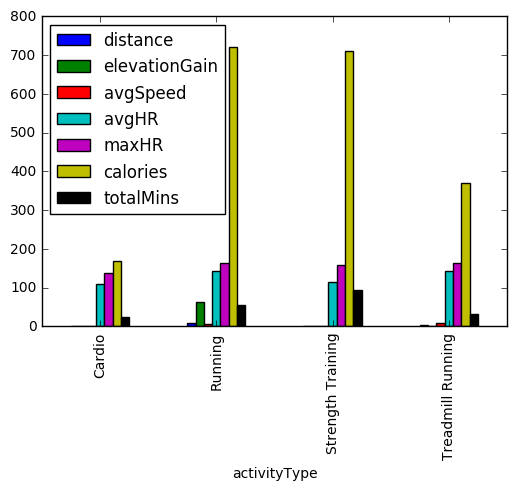

In [83]:
df.groupby("activityType").mean().plot(kind="bar")

In [84]:
## To-Do : Divide the Heart Rate Zones from the data into Zones and create a new column
# < 114 - Very Light
# 114-133 - Light
# 133-152 - Moderate
# 152-171 - Hard
# >171 - Very Hard
## do using lambda: apply a function

def get_hr_zones(avgHR):
    if math.isnan(avgHR):
        return "Not Recorded"
    if avgHR < 114:
        return "Very Light"
    elif avgHR >= 114 and avgHR < 133:
        return "Light"
    elif avgHR >= 133 and avgHR < 152:
        return "Moderate"
    elif avgHR >= 152 and avgHR < 171:
        return "Hard"
    else:
        return "Very Hard"

In [85]:
df["activityLevel"] = df.avgHR.apply(get_hr_zones)

In [86]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,NaN,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,NaN,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,NaN,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,NaN,7.23,150.0,184.0,481,31.12,Moderate


In [87]:
## For every month of every year, what was the running mileage?
## For running activities above 10 kms, how does the heart rate vary?
## Month with the highest running mileage?

In [88]:
## Average speed for the marathons runs?

## Handle Missing Values in Pandas?

In [89]:
df.tail()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
388,Running,Running,2013-03-10 17:51:00,10.40,85.0,7.40,NaN,NaN,884,79.47,Not Recorded
389,Running,Running,2013-02-17 07:05:00,9.86,81.0,5.46,NaN,NaN,818,56.55,Not Recorded
390,Running,Running,2012-10-31 07:12:00,5.17,33.0,7.24,NaN,NaN,419,38.18,Not Recorded
391,Running,Running,2012-10-15 18:10:00,4.05,29.0,8.08,NaN,NaN,317,32.53,Not Recorded
392,Running,Running,2012-10-13 17:38:00,5.11,35.0,8.29,NaN,NaN,392,43.21,Not Recorded


In [90]:
df.isnull().head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,False,False,False,False,True,False,False,False,False,False,False
1,False,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,True,True,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False


In [91]:
df.isnull().sum()

activityName       0
activityType       0
startTime          0
distance         207
elevationGain    283
avgSpeed         223
avgHR            148
maxHR            148
calories           0
totalMins          0
activityLevel      0
dtype: int64

In [92]:
df[df["distance"].isnull()].head() # filter values where null values are present in distance

## With times how have the strength training sessions varied? x-axis time
## Y-axis number of calories burned per minute spent in the gym?
## How has the heart rate varied by the bar color?

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
2,Strength Training,Strength Training,2016-09-20 07:23:00,NaN,NaN,NaN,125.0,167.0,859,75.28,Light
5,Strength Training,Strength Training,2016-09-13 08:12:00,NaN,NaN,NaN,123.0,162.0,735,65.45,Light
7,Strength Training,Strength Training,2016-09-10 06:24:00,NaN,NaN,NaN,101.0,148.0,514,66.23,Very Light
10,Strength Training,Strength Training,2016-09-03 06:18:00,NaN,NaN,NaN,113.0,175.0,619,65.07,Very Light
11,Strength Training,Strength Training,2016-09-01 07:43:00,NaN,NaN,NaN,105.0,145.0,604,72.10,Very Light


In [93]:
df["activityLevel"].value_counts()

Not Recorded    148
Light            97
Very Light       79
Moderate         49
Hard             20
Name: activityLevel, dtype: int64

In [94]:
df.shape

(393, 11)

In [95]:
df.dropna(how="any").head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
9,New York City Running,Running,2016-09-04 18:13:00,10.02,77.0,5.56,164.0,177.0,827,59.23,Hard
162,Hadapsar Running,Running,2016-03-20 18:00:00,5.88,11.0,5.38,159.0,180.0,481,33.04,Hard
238,Hadapsar Running,Running,2015-12-17 19:49:00,6.02,4.0,5.12,150.0,162.0,402,31.20,Moderate
239,Gondhale Nagar Running,Running,2015-12-17 19:34:00,1.52,3.0,6.02,134.0,148.0,100,9.10,Moderate
244,Hadapsar Running,Running,2015-12-10 19:30:00,9.02,9.0,5.33,153.0,166.0,650,50.03,Hard


In [96]:
df.dropna(how="all").shape   # No rows are dropped here

(393, 11)

In [97]:
df.dropna(subset=["activityName", "activityType"], how="any").shape  # if any of these subset values are missing drop it

(393, 11)

In [98]:
df.dropna(subset=["activityName", "activityType"], how="all").shape  # if any of these subset values are missing drop it

(393, 11)

In [99]:
df["distance"].value_counts(dropna=False).head() ## if dropna is false, shows the NaN values also

NaN       207
 10.01      4
 5.04       4
 10.02      3
 4.16       3
Name: distance, dtype: int64

In [100]:
df.isnull().sum()
df.fillna(value=0, inplace=True)

In [101]:
df.isnull().sum()

activityName     0
activityType     0
startTime        0
distance         0
elevationGain    0
avgSpeed         0
avgHR            0
maxHR            0
calories         0
totalMins        0
activityLevel    0
dtype: int64

In [102]:
## If Dataframe has values -1, then that value is Not Recorded
#df

## Exploring a Pandas Series

In [103]:
df.dtypes

activityName             object
activityType             object
startTime        datetime64[ns]
distance                float64
elevationGain           float64
avgSpeed                float64
avgHR                   float64
maxHR                   float64
calories                  int64
totalMins               float64
activityLevel            object
dtype: object

** For categorical columns **

In [104]:
df["activityLevel"].describe()

count              393
unique               5
top       Not Recorded
freq               148
Name: activityLevel, dtype: object

In [105]:
df["activityLevel"].value_counts()

Not Recorded    148
Light            97
Very Light       79
Moderate         49
Hard             20
Name: activityLevel, dtype: int64

In [106]:
type(df["activityLevel"].value_counts(normalize=True))

pandas.core.series.Series

In [107]:
df["activityLevel"].value_counts(normalize=True).head()

Not Recorded    0.376590
Light           0.246819
Very Light      0.201018
Moderate        0.124682
Hard            0.050891
Name: activityLevel, dtype: float64

In [108]:
df.activityType.unique()

array(['Running', 'Strength Training', 'Cardio', 'Treadmill Running'], dtype=object)

In [109]:
df.activityType.nunique()

4

In [110]:
pd.crosstab(df.activityType, df["activityLevel"])

activityLevel,Hard,Light,Moderate,Not Recorded,Very Light
activityType,,,,,
Cardio,0,16,1,17,26
Running,15,6,40,95,0
Strength Training,0,74,2,35,52
Treadmill Running,5,1,6,1,1


** For numeric columns ** 

In [111]:
df[df.distance > 0].describe()

,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
count,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000,185.000000
mean,8.057459,37.275676,5.820324,61.259459,70.064865,655.205405,53.474757
std,7.348033,67.761207,2.536526,71.010622,80.934529,574.781169,45.802545
min,0.010000,0.000000,0.000000,0.000000,0.000000,16.000000,4.020000
25%,3.500000,0.000000,5.310000,0.000000,0.000000,300.000000,25.500000
50%,5.250000,11.000000,6.050000,0.000000,0.000000,452.000000,36.430000
75%,10.040000,42.000000,6.510000,140.000000,160.000000,848.000000,69.590000
max,42.390000,592.000000,27.060000,168.000000,188.000000,3362.000000,280.590000


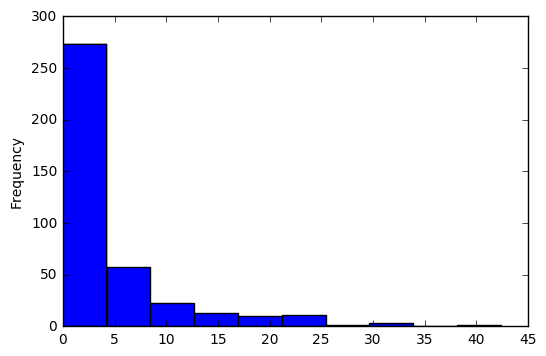

In [112]:
%matplotlib inline
df.distance.plot(kind="hist")

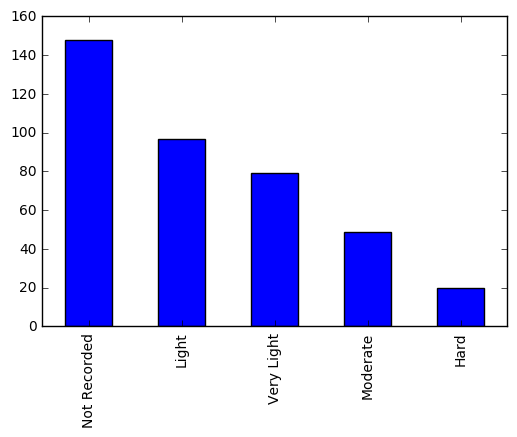

In [113]:
df["activityLevel"].value_counts().plot(kind="bar")

In [114]:
## a year vs heart rates at various dates, how it varies for different years (line graph)
## Area chart - Per Km speed for the Delhi Marathons vs Mumbai Marathons (Half)

## Radial Chart - Speed at every Km for a half marathon

## for half marathons, compared to the average speed, which laps were the fastest

## which days, which activities as a stacked bar chart, or bar charts

## For every Year, what has been the running mileage per month

In [115]:
df_running = df[(df["activityType"] == "Running") | (df["activityType"] == "Treadmill Running") ]

In [116]:
df_running.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate
6,New York City Running,Running,2016-09-10 18:32:00,5.07,50.0,5.42,0.0,0.0,412,28.55,Not Recorded


In [117]:
df_running.groupby(df_running["startTime"].dt.year)

In [118]:
for groups in df_running.groupby(df_running["startTime"].dt.year):
    year_Data = groups[1].groupby(groups[1].startTime.dt.month)
#     print groups[0]
    for mon_groups in year_Data:
        mystr = str(groups[0]) + "," + str(mon_groups[0]) + "," + str(mon_groups[1]["distance"].sum())
        print mystr
        

2012,10,14.33
2013,2,9.86
2013,3,30.62
2013,5,15.67
2013,12,21.55
2014,1,21.6
2014,3,45.76
2014,4,55.97
2014,5,20.91
2014,8,15.0
2014,9,23.72
2014,10,64.34
2014,11,78.04
2014,12,67.59
2015,1,42.0
2015,2,28.36
2015,3,6.57
2015,4,11.43
2015,6,20.83
2015,7,40.11
2015,9,31.99
2015,10,159.95
2015,11,149.78
2015,12,129.3
2016,1,112.59
2016,2,35.04
2016,3,46.4
2016,4,40.44
2016,5,25.23
2016,7,13.55
2016,8,43.51
2016,9,40.09


## When should I use the inplace parameter in Pandas?

In [119]:
df.shape

(393, 11)

In [120]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [121]:
#df.drop("activityLevel", axis=1, inplace=True)  # inplace = false by default # nothings happens

In [122]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [123]:
df.isnull().sum()

activityName     0
activityType     0
startTime        0
distance         0
elevationGain    0
avgSpeed         0
avgHR            0
maxHR            0
calories         0
totalMins        0
activityLevel    0
dtype: int64

In [124]:
## you can use methods like fillna to explore something, as its inplace=False, it wont matter and affect the data

## Video 17, Need to know about Pandas Index

In [125]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [126]:
# index and columns
df.index # are the rowlabels

RangeIndex(start=0, stop=393, step=1)

In [127]:
df.columns # are the column labels

Index([u'activityName', u'activityType', u'startTime', u'distance',
       u'elevationGain', u'avgSpeed', u'avgHR', u'maxHR', u'calories',
       u'totalMins', u'activityLevel'],
      dtype='object')

In [128]:
df.shape

(393, 11)

In [129]:
pd.read_table("http://bit.ly/movieusers", header=None, sep="|").head() # both rows and columns index are numbers

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [130]:
df[df["activityType"] == "Treadmill Running"] ## the index of rows are changed alongwith

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
254,Treadmill Running,Treadmill Running,2015-11-24 19:29:00,2.94,0.0,6.18,0.0,0.0,246,18.32,Not Recorded
259,Treadmill Running,Treadmill Running,2015-11-19 18:50:00,5.47,0.0,6.21,156.0,162.0,436,34.44,Hard
261,Treadmill Running,Treadmill Running,2015-11-17 19:37:00,4.22,0.0,7.42,153.0,174.0,434,32.27,Hard
262,Treadmill Running,Treadmill Running,2015-11-16 21:22:00,1.52,0.0,27.06,106.0,124.0,317,41.03,Very Light
274,Treadmill Running,Treadmill Running,2015-10-31 16:30:00,5.37,0.0,6.14,162.0,169.0,449,33.30,Hard
277,Treadmill Running,Treadmill Running,2015-10-28 21:51:00,4.01,0.0,6.52,152.0,158.0,339,27.28,Hard
279,Treadmill Running,Treadmill Running,2015-10-20 19:26:00,4.24,0.0,8.17,134.0,159.0,386,35.09,Moderate
289,Treadmill Running,Treadmill Running,2015-10-06 19:35:00,4.41,0.0,6.57,160.0,174.0,385,30.38,Hard
294,Treadmill Running,Treadmill Running,2015-10-01 20:59:00,4.29,0.0,7.34,135.0,162.0,360,32.24,Moderate
295,Treadmill Running,Treadmill Running,2015-09-29 19:33:00,3.77,0.0,9.36,147.0,177.0,426,36.09,Moderate


In [131]:
df.loc[300, "activityLevel"]

'Moderate'

In [132]:
df.set_index("activityName", inplace=True)

In [133]:
df.head()

,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
activityName,,,,,,,,,,
Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [134]:
df.index

Index([u'Running', u'Running', u'Strength Training', u'Running', u'Running',
       u'Strength Training', u'New York City Running', u'Strength Training',
       u'Running', u'New York City Running',
       ...
       u'Running', u'Running', u'Running', u'Running', u'Running', u'Running',
       u'Running', u'Running', u'Running', u'Running'],
      dtype='object', name=u'activityName', length=393)

In [135]:
df.columns

Index([u'activityType', u'startTime', u'distance', u'elevationGain',
       u'avgSpeed', u'avgHR', u'maxHR', u'calories', u'totalMins',
       u'activityLevel'],
      dtype='object')

In [136]:
df.shape

(393, 10)

In [137]:
df.loc["Treadmill Running", "startTime"] ## startTime is the name of the index

activityName
Treadmill Running   2015-11-24 19:29:00
Treadmill Running   2015-11-19 18:50:00
Treadmill Running   2015-11-17 19:37:00
Treadmill Running   2015-11-16 21:22:00
Treadmill Running   2015-10-31 16:30:00
Treadmill Running   2015-10-28 21:51:00
Treadmill Running   2015-10-20 19:26:00
Treadmill Running   2015-10-06 19:35:00
Treadmill Running   2015-10-01 20:59:00
Treadmill Running   2015-09-29 19:33:00
Treadmill Running   2015-09-26 13:47:00
Treadmill Running   2015-09-24 19:48:00
Treadmill Running   2015-09-23 21:31:00
Treadmill Running   2015-09-22 19:25:00
Name: startTime, dtype: datetime64[ns]

In [138]:
df.index.name = None  
df.head()

,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [139]:
df.index.name = "activityName"    # Reset the index back to the original values
df.reset_index(inplace=True)      # important to rename before, as that column will get the indexName
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [140]:
df.describe()

,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins
count,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000,393.000000
mean,3.792952,17.547074,2.739847,76.513995,97.628499,619.692112,66.227735
std,6.446725,50.022938,3.388450,61.226248,77.047788,492.830827,45.324054
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.270000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,223.000000,28.130000
50%,0.000000,0.000000,0.000000,109.000000,146.000000,503.000000,61.540000
75%,5.070000,7.000000,5.570000,124.000000,162.000000,887.000000,99.260000
max,42.390000,592.000000,27.060000,168.000000,188.000000,3362.000000,280.590000


In [141]:
df.describe().columns   # describe itself returns a dataframe and we can use all the dataframe methods

Index([u'distance', u'elevationGain', u'avgSpeed', u'avgHR', u'maxHR',
       u'calories', u'totalMins'],
      dtype='object')

In [142]:
df.describe().index

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [143]:
df.describe().loc["count", :]

distance         393.0
elevationGain    393.0
avgSpeed         393.0
avgHR            393.0
maxHR            393.0
calories         393.0
totalMins        393.0
Name: count, dtype: float64

In [144]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


** Using the other index functions **

In [145]:
df.activityLevel.head()

0        Hard
1    Moderate
2       Light
3        Hard
4    Moderate
Name: activityLevel, dtype: object

In [146]:
drinks = pd.read_csv("http://bit.ly/drinksbycountry")

In [147]:
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [148]:
drinks.continent.head() # index is one from the dataframe

0      Asia
1    Europe
2    Africa
3    Europe
4    Africa
Name: continent, dtype: object

In [149]:
drinks.set_index("country", inplace=True)

In [150]:
drinks.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
country,,,,,
Afghanistan,0,0,0,0.0,Asia
Albania,89,132,54,4.9,Europe
Algeria,25,0,14,0.7,Africa
Andorra,245,138,312,12.4,Europe
Angola,217,57,45,5.9,Africa


In [151]:
drinks.continent.head() ## see the change in the index (index is country)

country
Afghanistan      Asia
Albania        Europe
Algeria        Africa
Andorra        Europe
Angola         Africa
Name: continent, dtype: object

In [152]:
drinks.continent.value_counts() # it has index and values

Africa           53
Europe           45
Asia             44
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

In [153]:
drinks.continent.value_counts().index

Index([u'Africa', u'Europe', u'Asia', u'North America', u'Oceania',
       u'South America'],
      dtype='object')

In [154]:
drinks.continent.value_counts().values

array([53, 45, 44, 23, 16, 12])

In [155]:
drinks.continent.value_counts()["Africa"]

53

In [156]:
drinks.continent.value_counts().sort_values()

South America    12
Oceania          16
North America    23
Asia             44
Europe           45
Africa           53
Name: continent, dtype: int64

In [157]:
drinks.continent.value_counts().sort_index()

Africa           53
Asia             44
Europe           45
North America    23
Oceania          16
South America    12
Name: continent, dtype: int64

### What is the index used for?

* identification (covered in the previous video)
*  selection (covered in the previous video)
* alignment

** Example of Alignment **

In [158]:
# 'beer_servings' Series contains the average annual beer servings per person
drinks.beer_servings.head()

country
Afghanistan      0
Albania         89
Algeria         25
Andorra        245
Angola         217
Name: beer_servings, dtype: int64

In [159]:
# create a Series containing the population of two countries
people = pd.Series([3000000, 85000], index=['Albania', 'Andorra'], name='population')
people

Albania    3000000
Andorra      85000
Name: population, dtype: int64

In [160]:
# calculate the total annual beer servings for each country
(drinks.beer_servings * people).head()

Afghanistan            NaN
Albania        267000000.0
Algeria                NaN
Andorra         20825000.0
Angola                 NaN
dtype: float64

* The two Series were aligned by their indexes.
* If a value is missing in either Series, the result is marked as NaN.
* Alignment enables us to easily work with incomplete data.

In [161]:
# concatenate the 'drinks' DataFrame with the 'population' Series (aligns by the index)
pd.concat([drinks, people], axis=1).head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,population
Afghanistan,0,0,0,0.0,Asia,NaN
Albania,89,132,54,4.9,Europe,3000000.0
Algeria,25,0,14,0.7,Africa,NaN
Andorra,245,138,312,12.4,Europe,85000.0
Angola,217,57,45,5.9,Africa,NaN


In [162]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Running,Running,2016-09-25 04:06:00,9.48,0.0,5.06,161.0,177.0,825,48.23,Hard
1,Running,Running,2016-09-21 07:55:00,2.63,0.0,5.05,143.0,164.0,191,13.23,Moderate
2,Strength Training,Strength Training,2016-09-20 07:23:00,0.00,0.0,0.00,125.0,167.0,859,75.28,Light
3,Running,Running,2016-09-18 06:57:00,4.16,0.0,7.18,157.0,188.0,502,30.24,Hard
4,Running,Running,2016-09-15 03:03:00,4.22,0.0,7.23,150.0,184.0,481,31.12,Moderate


In [163]:
## Removing all the workouts done in the US
df.drop(df.index[0:18], inplace=True)

In [164]:
df.reset_index(inplace=True)

In [165]:
df.drop("index", inplace=True, axis=1)

In [166]:
df.head()

,activityName,activityType,startTime,distance,elevationGain,avgSpeed,avgHR,maxHR,calories,totalMins,activityLevel
0,Indoor Cardio,Cardio,2016-08-12 19:42:00,0.00,0.0,0.00,125.0,150.0,344,30.08,Light
1,Running,Running,2016-08-12 18:59:00,7.16,0.0,5.47,142.0,163.0,583,41.27,Moderate
2,Strength Training,Strength Training,2016-08-11 20:26:00,0.00,0.0,0.00,113.0,157.0,901,94.33,Very Light
3,Running,Running,2016-08-09 20:55:00,6.30,0.0,6.13,135.0,157.0,503,39.09,Moderate
4,Indoor Cardio,Cardio,2016-08-08 21:35:00,1.76,0.0,0.00,123.0,175.0,389,35.19,Light


In [167]:
#df.to_csv("check.csv")

In [172]:
df.startTime.unique.l

<bound method Series.unique of 0     2016-08-12 19:42:00
1     2016-08-12 18:59:00
2     2016-08-11 20:26:00
3     2016-08-09 20:55:00
4     2016-08-08 21:35:00
5     2016-08-08 20:36:00
6     2016-08-06 20:46:00
7     2016-08-06 20:22:00
8     2016-08-06 19:55:00
9     2016-08-06 19:31:00
10    2016-08-05 20:39:00
11    2016-08-03 20:51:00
12    2016-08-03 20:41:00
13    2016-08-02 21:54:00
14    2016-08-02 20:35:00
15    2016-07-30 20:35:00
16    2016-07-28 19:26:00
17    2016-07-27 21:17:00
18    2016-07-26 20:41:00
19    2016-07-25 20:47:00
20    2016-07-23 20:13:00
21    2016-07-22 20:50:00
22    2016-07-20 21:06:00
23    2016-07-19 20:26:00
24    2016-07-18 20:51:00
25    2016-07-16 20:41:00
26    2016-07-15 20:22:00
27    2016-07-14 20:39:00
28    2016-07-13 21:17:00
29    2016-07-13 20:31:00
              ...        
345   2014-10-12 05:52:00
346   2014-10-05 06:02:00
347   2014-10-01 18:40:00
348   2014-10-01 18:21:00
349   2014-09-28 17:36:00
350   2014-09-07 18:17:00
351   2